In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import torch

import torch.nn as nn
from torch.autograd import Function, Variable
from torch.nn.parameter import Parameter
import torch.nn.functional as F

from qpth.qp import QPFunction
import qpth

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
print(torch.__version__)

1.7.1+cpu


In [2]:
class IneqOptNet(nn.Module):
    def __init__(self, nFeatures, nHidden, nCls, bn, nineq=2, neq=0, eps=1e-4):
        super().__init__()
        self.nFeatures = nFeatures
        self.nHidden = nHidden
        self.bn = bn
        self.nCls = nCls
        self.nineq = nineq
        self.neq = neq
        self.eps = eps

        self.fc1 = nn.Linear(nFeatures, nHidden)
        self.fc2 = nn.Linear(nHidden, nineq * nCls + nineq)

    def forward(self, x):
        nBatch = x.size(0)
        # Normal FC network.
        x = x.view(nBatch, -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        print(x)
        Q = Variable(torch.stack([torch.eye(self.nCls) for _ in range(nBatch)]))

        q = Variable(torch.ones(self.nCls))
        x_t = x[:, :self.nineq * self.nCls]
        A = x_t.reshape(nBatch, self.nineq, self.nCls)
        x_b = x[:, self.nineq * self.nCls:]
        b = x_b
        e = Variable(torbch.Tensor())
        x = QPFunction(verbose=1)(Q, q, A, b, e, e)
        print(A)
        print(b)
        return F.log_softmax(x)

In [3]:
import math
import torch.optim as optim
import numpy as np


torch.manual_seed(3)
nBatch, nFeatures, nHidden, nCls = 16, 20, 20, 2
# Create random data
x = Variable(torch.randn(nBatch, nFeatures), requires_grad=False)
y = Variable((torch.rand(nBatch) < 0.5).long(), requires_grad=False)

model = IneqOptNet(nFeatures, nHidden, nCls, nineq=2, bn=False)
loss_fn = torch.nn.CrossEntropyLoss()

# Initialize the optimizer.
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

TRAIN_ITER = 10
ATTACK_ITER = 1
PRINT_FREQ = 10

for t in range(TRAIN_ITER):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % PRINT_FREQ == 0:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable weights
    # of the model)
    optimizer.zero_grad()

    # Backward pass: compute gradient of the zloss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


tensor([[ 0.1808,  0.2913,  0.1416,  0.0248,  0.1521,  0.0130],
        [ 0.1084, -0.1917,  0.1003, -0.2235, -0.1771, -0.1979],
        [-0.0273,  0.0112, -0.2736, -0.0182,  0.0333, -0.1634],
        [ 0.2419, -0.4293,  0.0379, -0.0152,  0.0023, -0.1519],
        [ 0.0153, -0.1340, -0.0781, -0.2366, -0.0497, -0.2036],
        [ 0.4946, -0.5082,  0.1141, -0.2986, -0.1932, -0.3327],
        [ 0.0057, -0.4614,  0.1078, -0.3349, -0.0447, -0.1574],
        [-0.4541,  0.6345, -0.3797,  0.0798,  0.3524, -0.4433],
        [ 0.0145,  0.1634, -0.1191, -0.1231,  0.1677, -0.2801],
        [-0.6439, -0.0282, -0.3218, -0.1881,  0.4400, -0.0426],
        [-0.1667,  0.3048, -0.3473,  0.0517, -0.2203, -0.6293],
        [ 0.1353,  0.0685, -0.0170, -0.0046, -0.2843, -0.2416],
        [-0.2131,  0.1217, -0.2505, -0.3916, -0.3869, -0.5044],
        [ 0.0437,  0.1728, -0.0638, -0.0376,  0.1061,  0.0215],
        [ 0.1870, -0.2128,  0.0846, -0.3467,  0.0068,  0.0472],
        [ 0.0654, -0.0664,  0.2500,  0.1

iter: 6, pri_resid: nan, dual_resid: nan, mu: nan
iter: 7, pri_resid: nan, dual_resid: nan, mu: nan
iter: 8, pri_resid: nan, dual_resid: nan, mu: nan
iter: 9, pri_resid: nan, dual_resid: nan, mu: nan
iter: 10, pri_resid: nan, dual_resid: nan, mu: nan
iter: 11, pri_resid: nan, dual_resid: nan, mu: nan
iter: 12, pri_resid: nan, dual_resid: nan, mu: nan
iter: 13, pri_resid: nan, dual_resid: nan, mu: nan
iter: 14, pri_resid: nan, dual_resid: nan, mu: nan
iter: 15, pri_resid: nan, dual_resid: nan, mu: nan
iter: 16, pri_resid: nan, dual_resid: nan, mu: nan
iter: 17, pri_resid: nan, dual_resid: nan, mu: nan
iter: 18, pri_resid: nan, dual_resid: nan, mu: nan
tensor([[[ 0.1776,  0.2880],
         [ 0.1317,  0.0280]],

        [[ 0.0928, -0.2038],
         [ 0.0985, -0.2250]],

        [[-0.0304,  0.0083],
         [-0.2738, -0.0314]],

        [[ 0.2317, -0.4356],
         [ 0.0307, -0.0230]],

        [[ 0.0016, -0.1479],
         [-0.0852, -0.2298]],

        [[ 0.4781, -0.5099],
         [ 0

iter: 11, pri_resid: nan, dual_resid: nan, mu: nan
iter: 12, pri_resid: nan, dual_resid: nan, mu: nan
iter: 13, pri_resid: nan, dual_resid: nan, mu: nan
iter: 14, pri_resid: nan, dual_resid: nan, mu: nan
iter: 15, pri_resid: nan, dual_resid: nan, mu: nan
iter: 16, pri_resid: nan, dual_resid: nan, mu: nan
iter: 17, pri_resid: nan, dual_resid: nan, mu: nan
iter: 18, pri_resid: nan, dual_resid: nan, mu: nan
tensor([[[ 0.1701,  0.2844],
         [ 0.1210,  0.0305]],

        [[ 0.0697, -0.2181],
         [ 0.0893, -0.2240]],

        [[-0.0320,  0.0045],
         [-0.2696, -0.0523]],

        [[ 0.2187, -0.4434],
         [ 0.0222, -0.0237]],

        [[-0.0108, -0.1650],
         [-0.0959, -0.2238]],

        [[ 0.4586, -0.5118],
         [ 0.0780, -0.2938]],

        [[-0.0344, -0.5120],
         [ 0.1114, -0.3393]],

        [[-0.4853,  0.5945],
         [-0.3768,  0.0652]],

        [[-0.0145,  0.1130],
         [-0.1150, -0.1411]],

        [[-0.6561, -0.0200],
         [-0.2850, -0.2

iter: 13, pri_resid: nan, dual_resid: nan, mu: nan
iter: 14, pri_resid: nan, dual_resid: nan, mu: nan
iter: 15, pri_resid: nan, dual_resid: nan, mu: nan
iter: 16, pri_resid: nan, dual_resid: nan, mu: nan
iter: 17, pri_resid: nan, dual_resid: nan, mu: nan
iter: 18, pri_resid: nan, dual_resid: nan, mu: nan
iter: 19, pri_resid: nan, dual_resid: nan, mu: nan
tensor([[[ 0.1608,  0.2835],
         [ 0.1132,  0.0312]],

        [[ 0.0463, -0.2252],
         [ 0.0788, -0.2177]],

        [[-0.0307,  0.0014],
         [-0.2623, -0.0741]],

        [[ 0.2070, -0.4487],
         [ 0.0158, -0.0182]],

        [[-0.0203, -0.1789],
         [-0.1074, -0.2160]],

        [[ 0.4408, -0.5106],
         [ 0.0602, -0.2865]],

        [[-0.0576, -0.5254],
         [ 0.1058, -0.3347]],

        [[-0.4997,  0.5761],
         [-0.3692,  0.0555]],

        [[-0.0199,  0.0899],
         [-0.1053, -0.1604]],

        [[-0.6641, -0.0124],
         [-0.2623, -0.3303]],

        [[-0.2454,  0.2573],
         [-0.4

In [4]:
class DumbNet(nn.Module):
    def __init__(self, nFeatures, nHidden=20, nCls=2, nineq=2):
        super().__init__()
        self.fc1 = nn.Linear(nFeatures, nHidden)
        self.fc2 = nn.Linear(nHidden, nineq * nCls + nineq)
        
    def forward(self, x):
        # Normal FC network.
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
      
        return x


In [5]:
dumbnet = DumbNet(nFeatures)

for dumbparam, param in zip(dumbnet.parameters(), model.parameters()):
    print(param)
    if dumbparam.requires_grad:
        dumbparam.data = param.data


Parameter containing:
tensor([[-0.1066,  0.2092,  0.1837,  0.1319, -0.1404, -0.1222,  0.0325, -0.1082,
         -0.0021, -0.1164, -0.0869,  0.0171, -0.1881,  0.0475, -0.0128, -0.1034,
         -0.1218, -0.1242,  0.1702, -0.0015],
        [-0.0582, -0.0237, -0.1722, -0.1932, -0.1625, -0.0418, -0.0966,  0.0725,
          0.1443, -0.1549,  0.1347, -0.0536, -0.0857,  0.2063, -0.1339,  0.0670,
          0.0743,  0.0793, -0.1083,  0.2007],
        [-0.1506, -0.0875,  0.2335, -0.0410, -0.1009, -0.2128, -0.2322, -0.1914,
         -0.0544, -0.1580,  0.0813, -0.0655, -0.1132, -0.1324,  0.2129,  0.0208,
          0.0558,  0.0335,  0.2084, -0.0179],
        [-0.0504, -0.0707, -0.1568, -0.0488,  0.0122,  0.0466,  0.0469, -0.0083,
          0.1832,  0.0495, -0.0594, -0.1395, -0.1936, -0.1492,  0.1026,  0.2073,
         -0.0206,  0.1587, -0.0701,  0.0737],
        [ 0.1524, -0.1699, -0.0223, -0.0836, -0.0366,  0.1986, -0.1000,  0.1764,
          0.0055, -0.2021, -0.0139, -0.0404, -0.1430,  0.1871, -0

In [6]:
torch.onnx.export(dumbnet, (x[0]), 'exported_qpth.onnx', verbose=True)

graph(%input.1 : Float(20:1, requires_grad=0, device=cpu),
      %fc1.bias : Float(20:1, requires_grad=1, device=cpu),
      %fc2.bias : Float(6:1, requires_grad=1, device=cpu),
      %12 : Float(20:1, 20:20, requires_grad=0, device=cpu),
      %13 : Float(20:1, 6:20, requires_grad=0, device=cpu)):
  %6 : Float(20:1, requires_grad=1, device=cpu) = onnx::MatMul(%input.1, %12) # \anaconda3\envs\layers\lib\site-packages\torch\nn\functional.py:1692:0
  %7 : Float(20:1, requires_grad=1, device=cpu) = onnx::Add(%6, %fc1.bias)
  %8 : Float(20:1, requires_grad=1, device=cpu) = onnx::Relu(%7) # \anaconda3\envs\layers\lib\site-packages\torch\nn\functional.py:1136:0
  %10 : Float(6:1, requires_grad=1, device=cpu) = onnx::MatMul(%8, %13) # \anaconda3\envs\layers\lib\site-packages\torch\nn\functional.py:1692:0
  %11 : Float(6:1, requires_grad=1, device=cpu) = onnx::Add(%10, %fc2.bias)
  return (%11)



In [7]:
adv_x = torch.Tensor([0.0, 0.0, 0.02177287590563355, 0.301682358529412, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.4592256413094989, 1.0, 0.279127541158317, 0.9686068731603378, 0.0, 0.18271248601973922, 1.0, 1.0, 0.0, 1.0])
adv_x = adv_x.reshape((1, 20))
model(adv_x)

tensor([[ 0.1000,  0.1000, -0.1000, -0.1000,  0.1000, -0.2000]],
       grad_fn=<AddmmBackward>)
iter: 0, pri_resid: 1.96086e+00, dual_resid: 0.00000e+00, mu: 1.67308e+00
iter: 1, pri_resid: 5.11922e-01, dual_resid: 0.00000e+00, mu: 2.48120e-01
iter: 2, pri_resid: 1.23637e-01, dual_resid: 1.19209e-07, mu: 7.65593e-01
iter: 3, pri_resid: 1.12757e-01, dual_resid: 5.33120e-07, mu: 8.55111e-01
iter: 4, pri_resid: 7.07556e-02, dual_resid: 9.83025e-07, mu: 3.06248e-03
iter: 5, pri_resid: 7.07539e-02, dual_resid: 3.14552e-06, mu: 2.54833e-02
iter: 6, pri_resid: 7.07241e-02, dual_resid: 1.05407e-04, mu: 1.42297e-01
iter: 7, pri_resid: nan, dual_resid: nan, mu: nan
tensor([[[ 0.1000,  0.1000],
         [-0.1000, -0.1000]]], grad_fn=<ViewBackward>)
tensor([[ 0.1000, -0.2000]], grad_fn=<SliceBackward>)


tensor([[-0.6931, -0.6931]], grad_fn=<LogSoftmaxBackward>)

# Generated inequalities 
(graphed using https://quickmath.com/webMathematica3/quickmath/graphs/inequalities/basic.jsp)
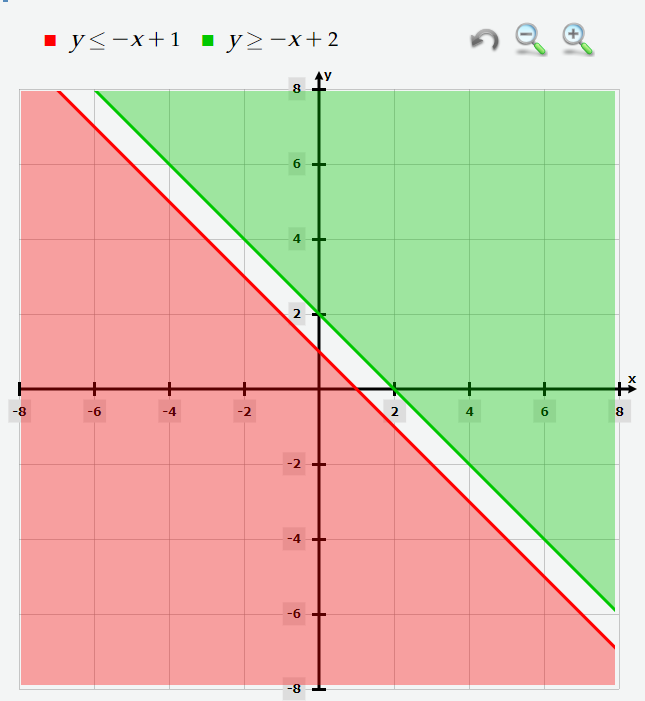